In [41]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [42]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [43]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [44]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [45]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [54]:
logistic_regression.coef_

array([[0.03707584, 0.72110283, 1.29148316]])

In [55]:
logistic_regression.intercept_

array([-31.98841657])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



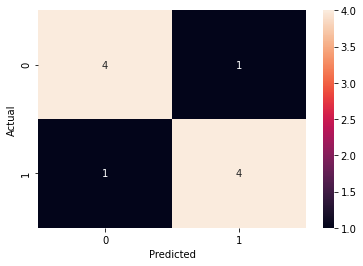

In [47]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

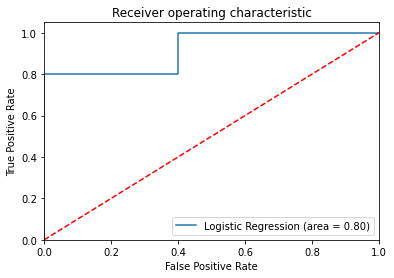

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


In [50]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

In [51]:
print (df2)
print (y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]
